# A Bayesian framework to estimate Chorus waves (Chorus wave global maps) in from low-Earth-orbit, Van Allen Probe and other datasets

This notebook is a proof-of-concept that describes how we can use hierarchical Bayesian framework to estimate event specific Chorus wave maps during quiet and extreme space weather conditions.

Follow through the notebook to generate the plots for data analysis, describes different models and does a small POC. You need to have *Matplotlib*, *Numpy*, *h5py* and *Pandas* installed. If you are not familiar with the IPython notebook format, start here: <http://ipython.org/index.html>

- All the documentatons are done using IPython and Pandoc.

Your files and directories should be organized as follow, in your working directory:

* *code*: contains this IPython notebook
* *figures*: where all figures will be saved
* *data*: where the CSV and hdf5 files should be. There are two sets of data: 
    1. The data compiled from the literature review on chorus waves:
            -Statis_wave_crres_chorus_model_intensity_fband_0P1-0P5fce.h5 
    2. The data generated by the analysis and Bayesian model.

    You can download these project from GitHub here: <https://github.com/shibaji7/Bayesian_Framework_CRRES>

- Feb, 2021. S. Chakraborty, G. S. Cunninghum

Email to <shibaji7@vt.edu> if you have any questions or comments!

## Background & Objective
Whistler-mode chorus waves are EM plasma waves observed in the Earth’s magnetosphere. The typical frequency range of chorus is from 0.3 to 0.5 $\Omega_{eo}$, where $\Omega_{eo}$ is the electron gyrofrequency at the magnetic equator. In this project we are going to use Bayesian Framework to model whistler-mode chorus waves (by its peak intensity) and quantfy the uncertainity for a specific event.

## Data Analysis
In this section we will demonstrate how CHW is distributed across *MLT* and *L** sector. In addition we will also demonstrate which parametertic distribution is better suited for the paramteric-data analysis. Note that, paramteric-Bayesian analysis will simplify the problem and help to get better insights about the data, but for real-time event based modeling we are proposing nonparametric Bayesian analysis.

 AE_bins: (3, 2)
 Distribution_bins: (99,)
 Lstar: (45,)
 Number_of_samples: (24, 13, 45, 3)
 Percentile_bins: (11,)
 Percentile_data: (11, 24, 13, 45, 3)
 MLAT: (13,)
 MLT: (24,)
 Distribution_data: (99, 24, 13, 45, 3)


/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:61: UserWarning: Log scale: values of z <= 0 have been masked
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:61: UserWarning: The following kwargs were not used by contour: 'shading'
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:62: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:104: RuntimeWarning: invalid value encountered in true_divide
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:104: RuntimeWarning: invalid value encountered in true_divide
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:104: RuntimeWarning: invalid value encountered in true_divide


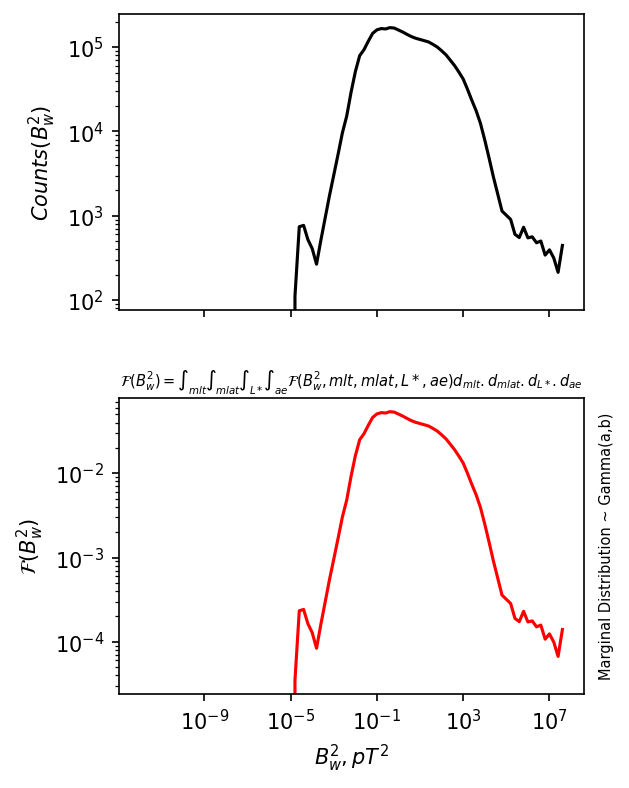

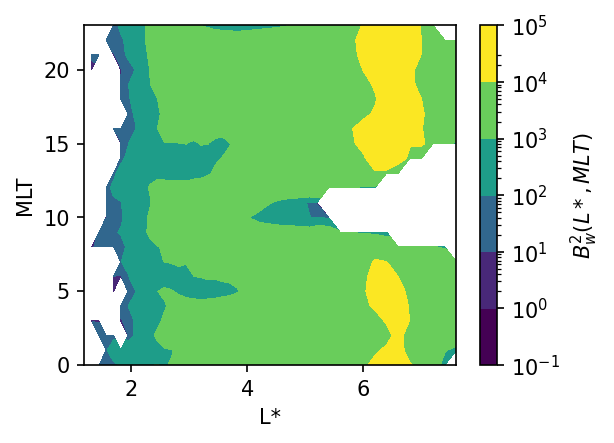

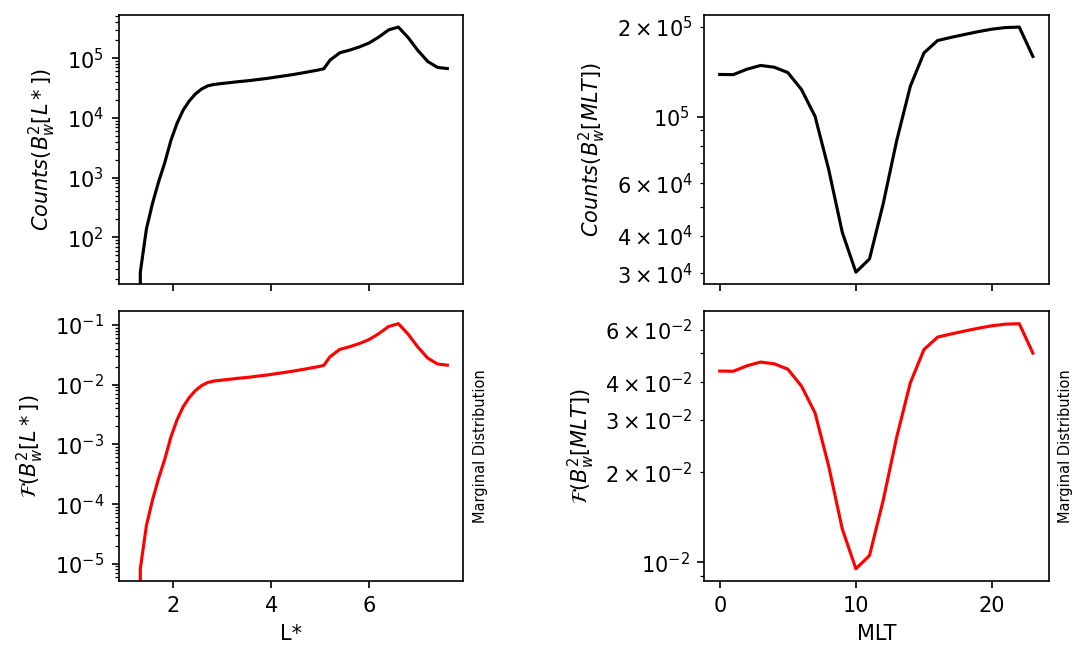

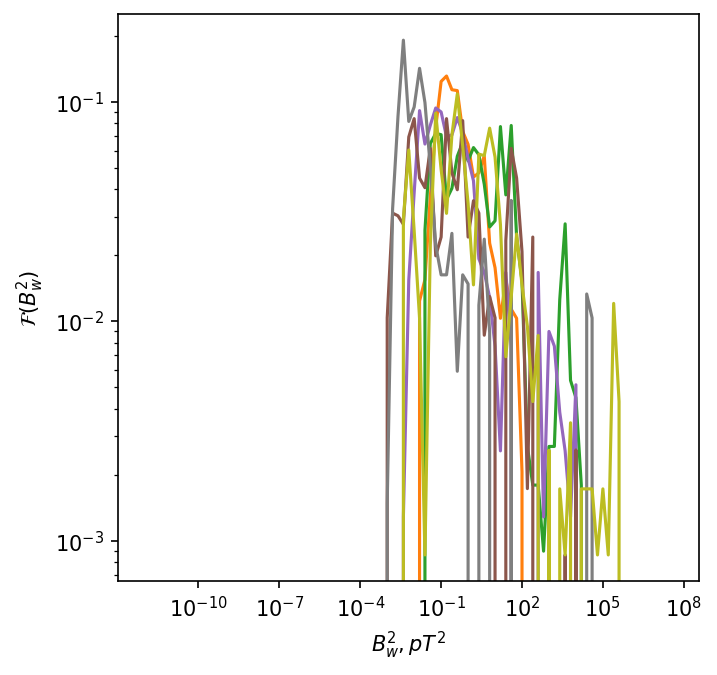

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

f = h5py.File("data/Statis_wave_crres_chorus_model_intensity_fband_0P1-0P5fce.h5", "r")

print(" AE_bins:", f["AE_bins"].shape)
print(" Distribution_bins:", f["Distribution_bins"].shape)
print(" Lstar:", f["Lstar"].shape)
print(" Number_of_samples:", f["Number_of_samples"].shape)
print(" Percentile_bins:", f["Percentile_bins"].shape)
print(" Percentile_data:", f["Percentile_data"].shape)
print(" MLAT:", f["mlat"].shape)
print(" MLT:", f["Mltime"].shape)
print(" Distribution_data:", f["Distribution_data"].shape)

AE_bins = f["AE_bins"][:]
Distribution_bins = f["Distribution_bins"][:]
Lstar = f["Lstar"][:]
Number_of_samples = f["Number_of_samples"][:]
Percentile_bins = f["Percentile_bins"][:]
Percentile_data = f["Percentile_data"][:]
mlat = f["mlat"][:]
mlt = f["Mltime"][:]
Distribution_data = f["Distribution_data"][:]

f.close()

###########################################
# 1D Marginal histogram
###########################################
# Plot marginal distribution of CRRES data -> [Bw^2, MLT, MLAT, L*, AE]
# the data is marginalized over all the axis
marginal_CRRES = Distribution_data.sum(axis=(1,2,3,4))
fig, axes = plt.subplots(dpi=150, nrows=2, ncols=1, sharex=True, figsize=(4,6))
ax = axes[0]
ax.loglog(Distribution_bins, marginal_CRRES, color="k")
ax.set_ylabel(r"$Counts (B_w^2)$")
ax = axes[1]
ax.loglog(Distribution_bins, marginal_CRRES/marginal_CRRES.sum(), color="r")
ax.set_ylabel(r"$\mathcal{F}(B_w^2)$")
ax.set_xlabel(r"$B_w^2, pT^2$")
ax.set_title(r"$\mathcal{F}(B_w^2)=\int_{mlt}\int_{mlat}\int_{L*}$"+\
             r"$\int_{ae}\mathcal{F}(B_w^2,mlt,mlat,L*,ae)$"+\
                r"$d_{mlt}.d_{mlat}.d_{L*}.d_{ae}$",fontdict={"size":7})
ax.text(1.05, 0.5, "Marginal Distribution ~ Gamma(a,b)", ha="center", va="center", transform=ax.transAxes, rotation=90,
       fontdict={"size":7})
fig.subplots_adjust(hspace=0.3)

###########################################
# 2D histogram
###########################################
# Plot marginal distribution of CRRES data -> [Bw^2, MLT, MLAT, L*, AE]
# the data is marginalized over AE and MLAT axis
marginal_ae_mlat_CRRES = Distribution_data.sum(axis=(0,2,4))
fig, ax = plt.subplots(dpi=150, figsize=(4,3))
ax.set_xlabel("L*")
ax.set_ylabel("MLT")
X, Y = np.meshgrid(Lstar, mlt)#marginal_ae_mlat_CRRES
pcm = ax.contourf(X, Y, marginal_ae_mlat_CRRES, shading="auto", 
              norm=colors.LogNorm(vmin=marginal_ae_mlat_CRRES.min() + 1, vmax=marginal_ae_mlat_CRRES.max()))
cb = fig.colorbar(pcm, ax=ax, extend="max")
cb.set_label(r"$B_w^2(L*,MLT)$")


###########################################
# 1D histogram
###########################################
# Plot marginal distribution of CRRES data -> [Bw^2, MLT, MLAT, L*, AE]
# the data is marginalized over AE, MLAT and MLT or L* axis
fig, axes = plt.subplots(dpi=150, figsize=(8,5), nrows=2, ncols=2, sharex="col")
ax = axes[0,0]
ax.set_ylabel(r"$Counts (B_w^2[L*])$")
ax.semilogy(Lstar, Distribution_data.sum(axis=(0,1,2,4)),color="k")
ax = axes[1,0]
ax.semilogy(Lstar, Distribution_data.sum(axis=(0,1,2,4))/Distribution_data.sum(axis=(0,1,2,4)).sum(), color="r")
ax.set_ylabel(r"$\mathcal{F}(B_w^2[L*])$")
ax.set_xlabel("L*")
ax.text(1.05, 0.5, "Marginal Distribution", ha="center", va="center", transform=ax.transAxes, rotation=90,
       fontdict={"size":7})

ax = axes[0,1]
ax.set_ylabel(r"$Counts (B_w^2[MLT])$")
ax.semilogy(mlt, Distribution_data.sum(axis=(0,2,3,4)),color="k")
ax = axes[1,1]
ax.semilogy(mlt, Distribution_data.sum(axis=(0,2,3,4))/Distribution_data.sum(axis=(0,2,3,4)).sum(), color="r")
ax.set_ylabel(r"$\mathcal{F}(B_w^2[MLT])$")
ax.set_xlabel("MLT")
ax.text(1.05, 0.5, "Marginal Distribution", ha="center", va="center", transform=ax.transAxes, rotation=90,
       fontdict={"size":7})
fig.subplots_adjust(hspace=0.1, wspace=0.7)

###########################################
# 1D histograms per MLT and L* bin
###########################################
# CRRES data -> [Bw^2, MLT, MLAT, L*, AE]
fig, ax = plt.subplots(dpi=150, figsize=(5,5))
ax.set_ylabel(r"$\mathcal{F}(B_w^2)$")
ax.set_xlabel(r"$B_w^2, pT^2$")
dist = Distribution_data.sum(axis=(2,4))
for _ix in range(0,len(mlt),8):
    for _jy in range(0,len(mlt),9):
        dat = dist[:, _ix, _jy]
        ax.loglog(Distribution_bins, dat/dat.sum())

## Proposed Models
### Heigherarchical Model
Note that for each $\text{i}^{\text{th}}$ MLT and $\text{j}^{\text{th}}$ L* bin there is a unique distribution (non-parmetric pdf) of chorus wave intensities available in the dataset. These distributions for different $\text{i}^{\text{th}}$ MLT and $\text{j}^{\text{th}}$ L* bins belong to a particular family of distributions, e.g., *Log-Normal* or *Gamma* or *Semi-Parametric*. This enables us to design a heigherarchical Bayesian-model that will provide a relationship between the parameters of these distributions with MLT and L*.


Following is an example of heigherarchical model:
$$B_w^2|MLT_{i},L^*_{j}\sim \mathcal{F}([\mu_{ij}]); \text{where } \mathcal{F} \text{ is an arbitrary pdf with parameters } [\mu_{ij}]; [.] \text{ denotes vector}$$

Now, we can build a relationship between $[\mu_{ij}]$ and $MLT_{i},L^*_{j}$ as follows:
$$\mu_{ij}=\mathcal{K}_0(MLT_{i},L^*_{j}); \text{where }\mathcal{K}_0\text{ is any arbirary function with coefficient matrix:} \lbrace\mathcal{C}_{0_{mn}}\rbrace; \lbrace.\rbrace \text{ denotes matrix}$$

Now, we can add another layer to this model by adding a distribution to the coefficients - $\lbrace\mathcal{C}_{0_{mn}}\rbrace$:
$$\lbrace\mathcal{C}_{0_{mn}}\rbrace\sim\mathcal{G}(\lbrace\gamma\rbrace); \text{ where } \lbrace\gamma\rbrace \text{ are the parameters of pdf }\mathcal{G}$$


We have the following options to simulate the $\text{2}^{\text{nd}}$ layer of the heigherarchical model:

* *Generalized Regression*: With -or- without Bayesian framework
* *Neural Net*: With -or- without Bayesian framework

### Simplified Parametric Model
From the figures presented in the previous analysis we can approximte $\mathcal{F}(B_w^2|MLT,L*)$ as a *Gamma* distribution. Note that gamma has a support of $(0,\infty)$. The *Gamma* distribution in shape-rate format has following form:
$$Gamma(\alpha,\beta)=\frac{\beta^{\alpha}}{\Gamma(\alpha)}x^{\alpha-1}e^{-x\beta}; x,\alpha,\beta>0$$

Under this assumptions we can write the models as follows:

* 1-Layer Heigherarchical Model:

$$\mathcal{F}(B_w^2|MLT_{i},L^*_{j})\sim Gamma(\alpha_{ij},\beta_{ij})$$
$$\alpha_{ij},\beta_{ij}=\mathcal{K}_0(MLT_{i},L^*_{j}); \text{where }\mathcal{K}_0\text{ is a function with functional form:} \mathcal{K}_0(x,y)=LogLink(\sum_{m\geq 0}\sum_{n\geq 0}\mathcal{C}_{0_{mn}}x^my^n)$$

* 2-Layer Heigherarchical Model:

$$\mathcal{F}(B_w^2|MLT_{i},L^*_{j})\sim Gamma(\alpha_{ij},\beta_{ij})$$
$$\alpha_{ij},\beta_{ij}=\mathcal{K}_0(MLT_{i},L^*_{j}); \text{where }\mathcal{K}_0\text{ is a function with functional form:} \mathcal{K}_0(x,y)=LogLink(\sum_{m\geq 0}\sum_{n\geq 0}\mathcal{C}_{0_{mn}}x^my^n)$$
$$\lbrace\mathcal{C}_{0_{mn}}\rbrace\sim\mathcal{G}(\alpha_0,\beta_0,\gamma_0);\text{where }\lbrace\mathcal{C}_{0_{mn}}\rbrace\text{ is the coefficient matrix for the function }\mathcal{K}_0$$

Note that, $\alpha_{ij},\beta_{ij}\in (0,\infty)$, thus, $\mathcal{K}_0$ can not be a linear regression, rather it should be a generalized regression with a *log* link function.